# Notebook 2: Interpreting Vertical Profiles

Previously we covered some introductory analysis of the h329 galaxy. The background context has led us to where we can begin diving more in depth on some other properties to come back to our original question: is the h329 galaxy a good sample for analyzing stellar properties and behavior?

One thing we need to better understand is the morphology of h329 as mentioned at the beginning of Notebook 1. We will begin by exploring the vertical profiles and using them to determine h329's scale length and scale height. We will use the numbers in Carroll and Ostile for the Milky-Way's scale length and height to see how well they compare. 

Citation for Carroll and Ostile:

    Carroll, B. W., Ostlie, D. A. & Addison-Wesley, S. F. P. (ed.) (2007). An Introduction to Modern Astrophysics.

## Setup of Everything that needs to run

In [2]:
import astropy

import matplotlib.pyplot as plt
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

% matplotlib inline

In [3]:
plt.style.use('bmh')

In [4]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/astro/store/gradscratch/tmp/sanchenn/h329gsonly_4096/h329.cosmo50PLK.3072gst5HbwK1BH.004096_gsonly'
h329, h329_h, h329_h1 = sim_setup(path_to_h329) 

## sim_setup is my code created to do the pynbody.load, physical_units(), sim.halos(), and make face-on for me 
## h329 is galaxy, h329_h is entire halo object, and h329_h1 is main halo
    ## We mainly use h329 or h329_h1

loading sim
making faceon


In [3]:
## Profiles Set up

## Gas particles profile:
h329_p_g = pynbody.analysis.profile.Profile(h329_h1.g, vmin =.01)
# Star particles profile:
h329_p_s = pynbody.analysis.profile.Profile(h329_h1.s, vmin =.01)

## Comparison of virial radius to max radius of the simulation
h329_Rvir = pynbody.analysis.halo.virial_radius(h329_h1) 
h329_Rmax = h329_h1.g['r'].max() ##This is R_MAX

print(h329_Rmax, h329_Rvir)

241.5968246100956 156.66934749611534


## Looking at Vertical Profiles 

Previously our profiles were all in the radial direction. Now we would like our profiles to be in the z direction meaning our slices that we talked about in Notebook 1: Intro to h329 are now going to be slices taken in the z direction (which include all of the radius from 0 to 241 kpc unless we specify otherwise). 

To define a vertical profile we now use the profile.VerticalProfile and call on the star particles. Along with that there are some extra parameters to define (see example  below): radial range (first 2 numbers) and maximum z value to consider (third number).

In [6]:
## Setting up vertical profiles
    ## If I want the radial area from 0 kpc to 20 kpc and take that in the z direction up until 5 kpc then I would define this:

h329_p_s_vert_3_5 = profile.VerticalProfile(h329_h1.s, '0 kpc', '20 kpc', '5 kpc')

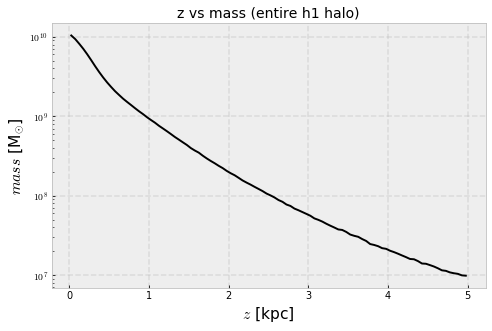

In [12]:
## The vertical profile we defined above would then look like this:

fig = plt.figure(figsize=[8, 5], dpi=70)

## Let's say I want to look at mass in the z-direction (we still must use rbins)
plt.plot(h329_p_s_vert_3_5['rbins'].in_units('kpc'), h329_p_s_vert_3_5['mass'].in_units('Msol'),'k') 
plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs mass (entire h1 halo)')
plt.semilogy(); ## Taking ln of mass

## Slicing h329 to Make a Disk

In my simulation setup I made "sim" = "h329". So if I use just h329 it is me calling on "sim" for the whole simulation.

We need to set up the main disk we would like to look at. We can use the pynbody filter functions to do this. By doing a disk filter on the h329 star particles we have a more isolated data set to look at. Plus, we are mainly interested in looking at disk thickness of 2 kpc so it is nice to create a filter for it and use our filtered data set to continue on in our analysis and with any graphs.

### Adding a Filter

In [13]:
## Let's do a maximum radius of 30 kpc and a thickness of 2 kpc for our disk

radius_d = 30 
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)

f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)

In [14]:
## Take h329 star particles only in defined disk (f_disk above)
h329_s_disk = h329.s[f_disk]

## Testing disk slice: comparing the disk stellar mass to the total stellar mass
print((h329_s_disk['mass'].sum() / 1e10), (h329.s['mass'].sum()/ 1e10 ))

8.454691548845627 8.989530881750891


Filter works and is cutting out some of the star particles. It doesn't cut out a ton of mass because majority of our stars are centered in our defined disk so there's not the biggest mass difference above. 

## Stellar Render Using h329 Disk with Filter

/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/sph/__init__.py:581: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros((ny, nx), dtype=np.float32)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:66: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)
/astro/apps6/anaconda2.0/envs/py3/lib/python3.5/site-packages/pynbody/plot/stars.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  brightest_mag.append(ordered[-len(ordered) / 5000])


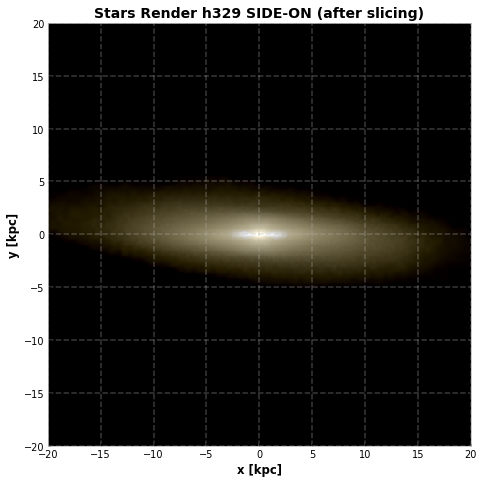

In [21]:
pynbody.analysis.angmom.sideon(h329_s_disk)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range=5)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (after slicing)', fontweight='bold')

pynbody.analysis.angmom.faceon(h329_s_disk);

If you compare this to Notebook 1 when we did the side-on stellar render you can see that this one looks a bit better! The disk and center area especially are better aligned with the normal plane. On the outskirts though there still is variation in the angle of the galaxy. 

## Main Vertical Profile

Now let's decide on our main vertical profile we are going to use to explore the scale length and scale height of h329: we will do 5 kpc to 20 kpc (as well as keep 2 kpc as the thickness). This will cut out the bulge in the center of the galaxy and still go outwards radially a decent amount.

In [23]:
## This is our vertical profile (sliced with the disk and specified within that to be from 5 to 20 kpc)
h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc')

## e can create a normal radial style profile with only the disk we cut out as well.
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01)

We will use the above vertical profile for finding scale height of h329 and the above normal radial style profile for finding our scale length of h329.

## Profiles of h329 Disk 

Let's make our profiles of h329 with the disk.

There are 2 main profiles we will be analyzing:

- One is the radius verus stellar mass. This will at first look like an exponential. Then if we take the natural log of stellar mass it will look linear. By fitting a line to the natural log of stellar mass we will find the scale length.

- The second one is the z-direction versus stellar mass. This one will first look Gaussian, and then we will natural log the stellar mass again to fit a parabolic function and a sech^2 function to find the scale height.

### Radius Versus Stellar Mass

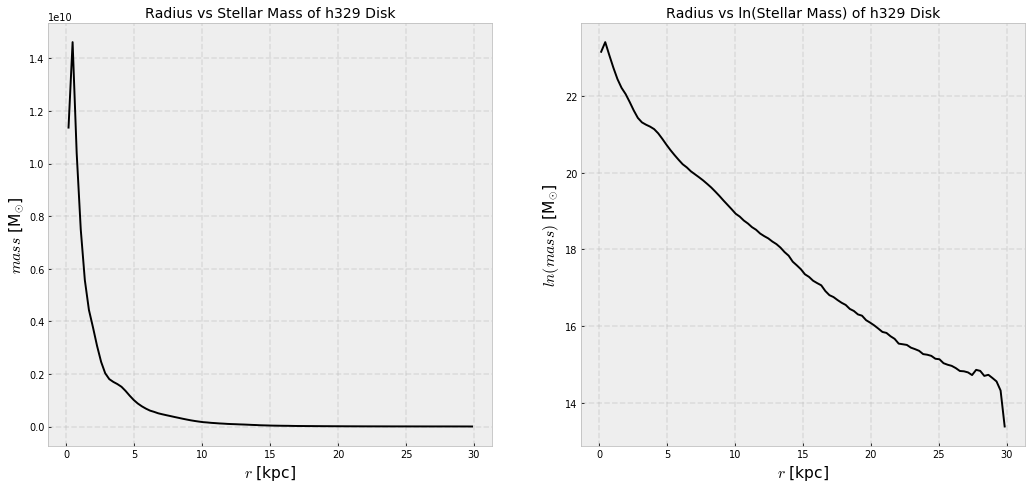

In [24]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass of h329 Disk')

axs[1].plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) of h329 Disk');

The exponential and linear functions look pretty nice for h329! The linear function is a bit funky at the edges of the graph so similar to the vertical profile where I took the radial range to be 5 to 20 kpc, I am going to do the same thing for the linear graph when we are fitting the line. Fitting the line will begin right after we look at the z-direction versus stellar mass below!

### Z-Direction Versus Stellar Mass

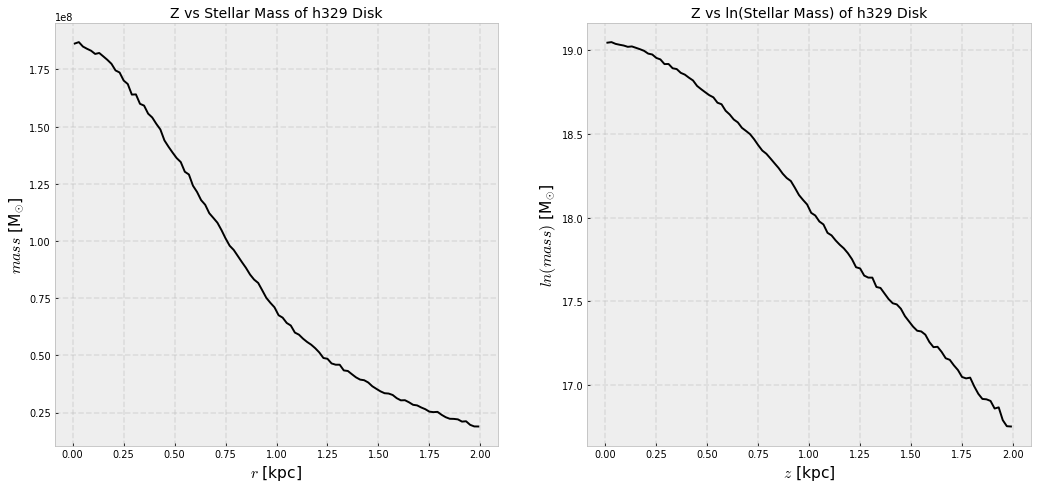

In [27]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_vert_sliced['rbins'].in_units('kpc'), h329_p_s_vert_sliced['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Z vs Stellar Mass of h329 Disk')

axs[1].plot(h329_p_s_vert_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$z$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Z vs ln(Stellar Mass) of h329 Disk');

As we can see the graphs fit fairly well to the shape of a Gaussian and parabola. We will see below when we do the actual fitting how well they come out!

# Best Fits

## Best Fit for Radius versus ln(Stellar Mass): Linear Fit

We will use sigma_r = Ae^(-r/r_0) and make it linear by ln (sigma_r) = ln(A) + (-r/r_0). Then we will use curve_fit to find mx+b where b = ln(A) and m = -1/r_0.

In [28]:
## Defining a linear function
## my_x is the x axis (radius), my_m is the slope, and my_b is the additive constant
def linear(my_x, my_m, my_b):
    y = (my_m*my_x) + my_b
    return y

In [30]:
## We decided above that the best section to do a linear fit on would be from 5 to 20 kpc

## We can define a condition to isolate that section and make arrays specifically for 5-20 kpc
condition = np.logical_and(h329_p_s_sliced['rbins'].in_units('kpc') > 5, h329_p_s_sliced['rbins'].in_units('kpc') < 20)

## Here are the arrays for 5-20 kpc. We will use this in the fitting
my_x_rad = np.extract(condition, h329_p_s_sliced['rbins'].in_units('kpc'))
my_y_mass = np.extract(condition, np.log(h329_p_s_sliced['mass'].in_units('Msol')))

In [31]:
## I am using curve_fit function and defining the fit parameters as fitpars_lin and the error as error_lin
fitpars_lin, error_lin = curve_fit(linear, my_x_rad, my_y_mass)

## fitpars_lin returns our fit variables as (m, b) or (slope, additive constant)
fitpars_lin

array([ -0.30806879,  22.10844565])

### Let's See the Fit Line!

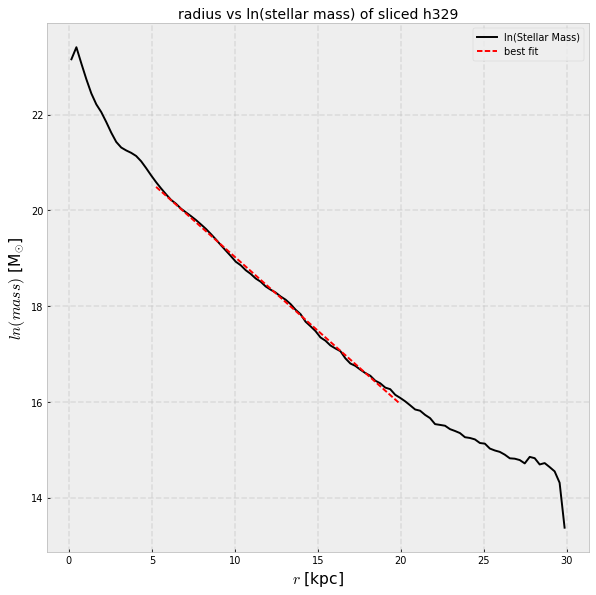

In [32]:
## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad, linear(my_x_rad, *fitpars_lin), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad which was specifically the 5-20 kpc arrays we used to make the fit!!
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('radius vs ln(stellar mass) of sliced h329')
plt.legend();

In [34]:
## Let's see the error in the parameters for the value of m and b!
perr = np.sqrt(np.diag(error_lin))
perr

array([ 0.00185117,  0.02467343])

This fit is very good! The graph looks accurate and the error is minimal. Now we can calculate the scale length with confidence using our slope value and relating it back to our original equation to find scale height!

In [35]:
## Now we can find the scale length using the fitted line and variables

my_r_0 = -1 / fitpars_lin[0] ##fitpars_lin[0] is just the fitted m (slope) value

print(my_r_0)

3.24602823187


Milky Way r_0 comparison from the Carrol and Ostille textbook (pg 919).

h_r = 3.5 kpc for the Milky Way 

h329 has a scale length of about 3.25 as shown above. This is a fairly close comparison to the Milky-Way! In terms of scale length, at least, we so far look good in comparison to Milky Way data values. 

## Best Fit for z vs Stellar Mass: Parabolic Fit 

We are going to be using curve_fit so that we can elimiate the option for a p1 value. We don't want to give this option because our parabola and gaussian should be perfectly centered on z=0. Ideally if we gave a p1 option, then it would be basically 0. 

Similarly here we are starting with the Gaussian: sigma_z = Ae^[(-z/z_0)^2], then after doing the natural log we have a polynomial to fit to the curve. ln_sigma = ln A + ((-z/z_0)^2)

We want to know p0 and p2. Our p2 = -1 / (z_0)^2 which will give us scale height of h329. 

In [36]:
## Let's define our arrays that we will use so that we can call on simply my_z and my_mass in the fitting and graphs!

my_z = h329_p_s_vert_sliced['rbins'].in_units('kpc')
my_mass = np.log(h329_p_s_vert_sliced['mass'].in_units('Msol'))

In [37]:
## z_var is the z-axis array, my_p2 represents the term in front of z^2 in the polynomial, and my_const is the additive constant
def quad_cen(z_var, my_p2, my_const):
    y = (my_p2 *(z_var**2)) + my_const ## See description above for explanation of where this function comes from!
    return y

In [38]:
## Similar to before I am defining fitpars_quad for the quadratic fit variables and the error in those values as error_quad

fitpars_quad, error_quad = curve_fit(quad_cen, my_z, my_mass)

print(fitpars_quad)

[ -0.59943784  18.83117541]


### Let's graph the parabolic fit

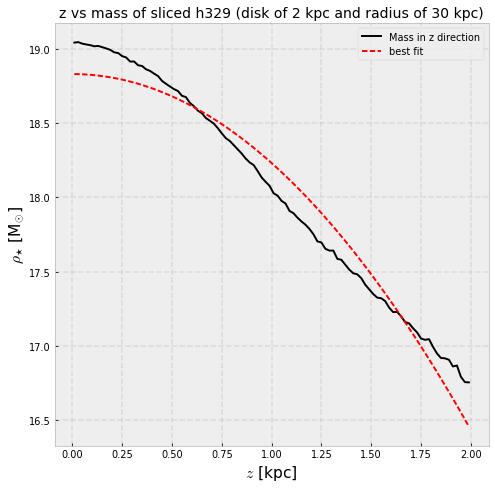

In [40]:
fig = plt.figure(figsize=[8, 8], dpi=70)

plt.plot(my_z, np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k', label='Mass in z direction') 
plt.plot(my_z, quad_cen(my_z, *fitpars_quad), linestyle='--', color='r', label='best fit' )
plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs mass of sliced h329 (disk of 2 kpc and radius of 30 kpc)')
plt.legend();

Although this does not look like a great fit let's still see what the scale height would be!

In [42]:
## The scale height value - see how this was defined in description above!
my_z0_2 = np.sqrt(-1/fitpars_quad[0])
my_z0_2

1.291599665760869

Again this is not the closest scale height to the Milky Way (Milky-Way's scale height is less than 1). Let's also try a sech^2 fit which will begin below!

## Best Fit for z Versus Stellar Mass: Hyperbolic sech^2 Fit

In [43]:
## Let's define our new function! my_z_new is the z axis array and my_amp is the additive constant
def sech2(my_z_new, my_z0_new, my_amp):
    y = ((np.cosh(my_z_new*my_z0_new))**(-2))*my_amp
    return y

In [46]:
## Defining our fit variables!
fitpars_sech2, error_sech2 = curve_fit(sech2, my_z, (h329_p_s_vert_sliced['mass'].in_units('Msol'))) ## we don't use np.log in this one!

## fitpars_sech2 gives (my_z0_new, my_amp) so (z0, additive constant)
fitpars_sech2

array([ -1.02048650e+00,   1.80424405e+08])

### Let's graph the sech^2 fit

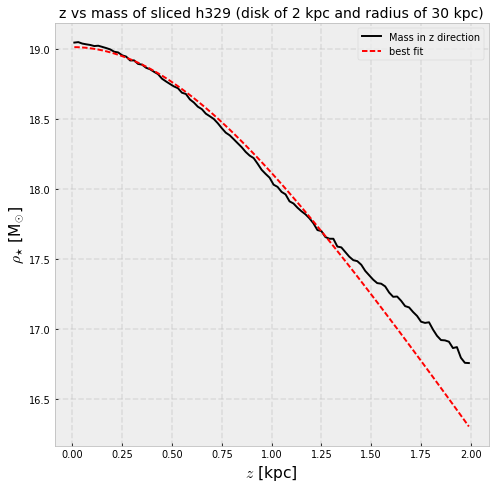

In [47]:
## Graphing our sech^2 fit along with our original z verus stellar mass data

fig = plt.figure(figsize=[8, 8], dpi=70)

plt.plot(my_z, np.log(h329_p_s_vert_sliced['mass'].in_units('Msol')),'k', label='Mass in z direction') 
plt.plot(my_z, np.log(sech2(my_z, *fitpars_sech2)), linestyle='--', color='r', label='best fit' )
plt.xlabel('$z$ [kpc]', fontsize=16)
plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$]', fontsize=16)
plt.title('z vs mass of sliced h329 (disk of 2 kpc and radius of 30 kpc)')
plt.legend();

In [49]:
## Now let's look at our new estimate for the scale height!!
my_z0_new = -1/(fitpars_sech2[0])
my_z0_new

0.97992477558706792

This is actually a lot better than before and a bit closer to the Milky Way scale height! Our estimate for teh scale height of h329 is 0.98!

# End

This was a bit of a longer notebook, but we did a lot! We explored our vertical profiles, we found fits to our 2 main profiles, and we interpretted our data by using the fits to calculate scale length and height and compare those to the Milky Way.